In [ ]:
"""
* Object Creation:DataFrame()
    # by an array
    # by a dict
* Viewing Data
    # index/columns/values
    # head/tail/describe/T/sort_index/sort_values
* Selection/引用
* Setting/修改或添加 DataFrame的值
* Missing Data
* Operations
* Merge
* Grouping
* Reshaping
* Time Series
* Categoricals
* Plotting
* Getting Data In/Out
* Gotchas
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
* Object Creation
"""
# Creating a Series by passing a list of values
s = pd.Series([5,3,1,np.nan,6,8])   # pandas create a default integer index begining with 0

# Creating a DataFrame by passing a NumPy array
dates = pd.date_range('20190123',periods=6) # 返回DatatimeIndex类的实例对象，有数据成员values
dates.values # array
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD')) # index行指标：Index or array-like
                                                     # columns 列指标，Index or array-like，默认自动从0编号
df

,A,B,C,D
2019-01-23,0.439254,0.852722,0.484558,2.045152
2019-01-24,0.252697,0.042522,0.742280,0.697301
2019-01-25,0.189573,-0.299197,0.062078,-0.390720
2019-01-26,2.304668,-0.087423,0.530767,0.374868
2019-01-27,-0.505300,1.219322,0.393971,0.822502
2019-01-28,-0.166813,0.238928,-0.989384,-1.582462


In [3]:
# Creating a DataFrame by passing a dict
df1 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20190123'),
                   'C':np.array([3]*4,dtype=np.int32),
                   'D':pd.Series(1,index=list(range(4)),dtype=np.float32),
                   'E':pd.Categorical(['test','train','test','trian']),
                   'F':'foo'})
df1    # The columns have different dtypes; 行的个数取决于最大值 4

,A,B,C,D,E,F
0,1.0,2019-01-23,3,1.0,test,foo
1,1.0,2019-01-23,3,1.0,train,foo
2,1.0,2019-01-23,3,1.0,test,foo
3,1.0,2019-01-23,3,1.0,trian,foo


In [4]:
"""
* Viewing Data
# index/columns/values;  head()/tail()/describe()/T/sort_index()/sort_values()
# return a Dataframe,rather than modify itself
"""
# viewing the top and bottom rows of the frame
df.head()
df.tail(3)
# Display the index, columns, and the underlying NumPy data
df.index
df.columns
df.values
# describe() shows mean / std / min / max / 25% of each column
df.describe()
# Transpose the frame
df.T    
# sorting by an axis
df.sort_index(axis=1,ascending=False)  # axis=1 'D C B A'
# sorting by values
df.sort_values(by='B')

,A,B,C,D
2019-01-25,0.189573,-0.299197,0.062078,-0.390720
2019-01-26,2.304668,-0.087423,0.530767,0.374868
2019-01-24,0.252697,0.042522,0.742280,0.697301
2019-01-28,-0.166813,0.238928,-0.989384,-1.582462
2019-01-23,0.439254,0.852722,0.484558,2.045152
2019-01-27,-0.505300,1.219322,0.393971,0.822502


In [5]:
"""
* Selection/引用
# []
# .at / .iat / .loc[] / .iloc[], 注意是[]不是()
"""
# Getting
df['A']  # Selecting a single column,equivalent to df.A,结果为a Series
# Selecting via [], which slices the rows,结果为 a DataFrame
df[0:3]
df['20190124':'20190127']

# Selection by Label:  .loc[] label为index or columns or : or []
df.loc['20190124']   # by index
df.loc[:,'A']
df.loc[:,['A','C']]  # Selecting on a multi-axis by label
df.loc['20190124':'20190126',['A','B']]
df.loc['20190124','A']   # scalar

# Select via the position of the passed integers: .iloc[]
df.iloc[3]   # 选出第4行 数据
df.iloc[3:5,0:2] # by integer slices, similar to python
df.iloc[[1,2,4],[0,2]] # By lists of integer position locations
df.iloc[1:3,:]
df.iloc[:,1:3]
df.iloc[1,1]     # scalar

df.iat[1,1]      # just for getting a scalar faster

0.04252194816631809

In [6]:
# Boolean Indexing
df[df.A>0]   # Using a single column’s values to select data，结果保留为True的rows
# df[df[0:1]>0]

# Selecting values from a DataFrame where a boolean condition is met.
df[df>0]  # 结果为True的保留，为False的为NaN;结果的shape保持不变


,A,B,C,D
2019-01-23,0.439254,0.852722,0.484558,2.045152
2019-01-24,0.252697,0.042522,0.742280,0.697301
2019-01-25,0.189573,NaN,0.062078,NaN
2019-01-26,2.304668,NaN,0.530767,0.374868
2019-01-27,NaN,1.219322,0.393971,0.822502
2019-01-28,NaN,0.238928,NaN,NaN


In [7]:
# Using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three'] # 像python的dict一样添加元素
df2[df2['E'].isin(['two','four'])]  # 保留为 True的每一行


,A,B,C,D,E
2019-01-25,0.189573,-0.299197,0.062078,-0.390720,two
2019-01-27,-0.505300,1.219322,0.393971,0.822502,four


In [8]:
# Setting
# Setting a new column automatically aligns the data by the indexs
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20190124',periods=6))
df['F'] = s1  # 通过对齐indexs来添加一列，若indexs不对应，用NaN补全

# Setting values by label
df.at['20190123','A'] = 0   # can revise the value of DataFrame
# Setting value by position
df.iat[0,1] = 0
# Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2019-01-23,0.000000,0.000000,0.484558,5,NaN
2019-01-24,0.252697,0.042522,0.742280,5,1.0
2019-01-25,0.189573,-0.299197,0.062078,5,2.0
2019-01-26,2.304668,-0.087423,0.530767,5,3.0
2019-01-27,-0.505300,1.219322,0.393971,5,4.0
2019-01-28,-0.166813,0.238928,-0.989384,5,5.0


In [9]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2019-01-23,0.000000,0.000000,-0.484558,-5,NaN
2019-01-24,-0.252697,-0.042522,-0.742280,-5,-1.0
2019-01-25,-0.189573,-0.299197,-0.062078,-5,-2.0
2019-01-26,-2.304668,-0.087423,-0.530767,-5,-3.0
2019-01-27,-0.505300,-1.219322,-0.393971,-5,-4.0
2019-01-28,-0.166813,-0.238928,-0.989384,-5,-5.0


In [10]:
# Missing Data
# np.nan  .reindex, .dropna, .fillna, .isna
# Reindexing allows you to change/add/delete the index on a specified axis. 
# This returns a copy of the data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.iloc[0:2,-1] = 1

# To drop any rows that have missing data.
df1.dropna(how='any')   # return a dataframe,but not revise itself
# filling missing data
df1.fillna(value=5)
# to get the boolean mask where values are nan
pd.isna(df1)  # return a dataframe with the same shape

,A,B,C,D,F,E
2019-01-23,False,False,False,False,True,False
2019-01-24,False,False,False,False,False,False
2019-01-25,False,False,False,False,False,True
2019-01-26,False,False,False,False,False,True


In [11]:
# operations
df.mean()   # axis = 0,列，默认
df.mean(1)  # axis = 1,行
df.shift(2) # 默认整行移动，每一列向下shift2
df.shift(2,axis=1) # 注，各列的数据类型可能不一样，整列移动要小心

s = pd.Series([1,3,5,7,np.nan,11],index=dates)
df.sub(s,axis='index')  #axis 被减数的index必须与减数的index一样

,A,B,C,D,F
2019-01-23,-1.000000,-1.000000,-0.515442,4.0,NaN
2019-01-24,-2.747303,-2.957478,-2.257720,2.0,-2.0
2019-01-25,-4.810427,-5.299197,-4.937922,0.0,-3.0
2019-01-26,-4.695332,-7.087423,-6.469233,-2.0,-4.0
2019-01-27,NaN,NaN,NaN,NaN,NaN
2019-01-28,-11.166813,-10.761072,-11.989384,-6.0,-6.0


In [12]:
# DataFrame.apply( 函数的引用 )
df.apply(np.cumsum)
df.apply(lambda x:x.max()-x.min(),axis = 1) 
df.apply(lambda x:x.max()-x.min())          #axis 默认为0，列

A    2.809968
B    1.518519
C    1.731664
D    0.000000
F    4.000000
dtype: float64

In [13]:
# Histogramming
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

4    3
3    2
2    2
0    2
5    1
dtype: int64

In [14]:
# String methods
s = pd.Series(['A','B','C','aABA','Baca',np.nan,'asd','cat'])
s.str.lower()  # type(s.str) : strings.StringMethods
# dir(s.str)     # s.str 具有几乎所有的 string 方法

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6     asd
7     cat
dtype: object

In [15]:
"""
* Merge
# pd.concat(arg1,arg2)
# pd.merge(arg1,arg2)
# df.append(s)
"""
# Concat : pd.concat(objs,axis=0)
df = pd.DataFrame(np.random.randn(10,4))
pieces = [df[:3],df[3:7],df[7:]]         # 3个DataFrame构成的list
pd.concat(pieces)

,0,1,2,3
0,-0.271963,-0.461513,1.655676,0.922025
1,-1.058546,1.822025,-0.147034,-0.245550
2,-0.005239,0.659959,0.476648,0.848194
3,0.662190,0.598037,-1.587767,-0.299949
4,1.664034,-0.653140,-0.047281,-1.409923
5,-0.289328,0.895317,-0.479531,0.030718
6,0.190776,0.607129,0.427322,0.412948
7,0.389660,0.884113,0.827592,-0.011329
8,-1.708385,0.472660,0.017643,0.788392
9,-0.093378,-0.761802,0.501659,0.426448


In [16]:
# join : SQL style merges
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
pd.merge(left,right,on='key')

left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [17]:
# Append
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s,ignore_index = True) # ignore_index默认为False，即连index的值一起append


,A,B,C,D
0,-1.925189,-0.454349,-0.292802,-0.735464
1,-0.903129,1.322500,-0.043542,0.396194
2,-0.125492,0.263621,-0.991371,-1.814717
3,0.234464,0.933616,-0.808060,0.370832
4,0.516939,1.246493,-1.263356,-0.486322
5,0.787604,-0.541162,0.390268,0.963251
6,0.648889,1.478472,-0.665536,-0.129326
7,-2.558272,-0.465984,-0.338207,-1.144345
8,0.234464,0.933616,-0.808060,0.370832


In [79]:
"""
* Grouping: 
# obj.groupby(key,axis=0) involving one or more of the following steps
  # Splitting  the data into groups 
  # Applying a function to each group independently
  # Combining the results into a data structure
"""
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
grouped = df.groupby('A')  # group by A column,返回的是一个DataFrameGroupBy object
grouped.get_group('bar')   # .get_group('bar') 取出分组后 'bar'组的数据，类型同为DataFrame
grouped.last()  # 最后一个分组保存在成员last中，要调用执行需加(),即.last()
grouped.groups  # 结果type为dict,key为'foo'和'bar'，value为indexs组成的列表，即对每行数据划分组
                # 所以，可以有 df.iloc[grouped.groups['bar'],:]
grouped.size()  # bar 3   foo 5
grouped = df.groupby(['A','B'])  # group by both A and B columns,结果为层级分组
grouped.get_group(('foo','one')) # 为取出层级分组的数据，需要提供一个元组
grouped.groups  # 结果type为dict,key为tuple,如('foo','one')，value为indexs组成的列表

# grouped.sum()   # applying the sum() function to the resulting groups

# grouped.<TAB> 按tab键会自动补全对象grouped的所有方法

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [80]:
# Grouping进阶
# Above operations split the DataFrame on its index (rows). We could also split by the columns
# 在列上将数据划组
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

grouped = df.groupby(get_letter_type, axis=1) # key为自定义函数引用名，
grouped.groups    # 结果为一个dict，键 为'vowel'和'consonant'，值 为['B', 'C', 'D']和['A']

# groupby with multiIndex
# creating a Series with a two-level MultiIndex
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
s = pd.Series(np.random.randn(8), index=index)
s.groupby(level=0).sum()
s.groupby(level='second').sum()

second
one   -0.276967
two   -0.106858
dtype: float64

In [81]:
"""
* Reshaping
# stack / unstack
# Pivot Tables
"""
# stack(level=-1,dropna=True): 最右变化最快
# Stack the prescribed level(s) from columns to index
tuples = list(zip(['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                  ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']))
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2 = df[:3]
stacked = df2.stack() # the shape from (3,2) to (6,1)
stacked.unstack()     # default unstacks the last level -1
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.745703  0.183050
       B -1.512546 -0.102236
two    A -0.863730       NaN
       B -0.500384       NaN

In [82]:
# Pivot Tables

In [83]:
# Time Series : performing resampling operations ???
rng = pd.date_range('1/1/2019',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5min').sum()

# ts.tz_localize('UTC')
# ts.tz_convert('US/Eastern')
# ts.to_period()

2019-01-01    26651
Freq: 5T, dtype: int32

In [84]:
# Categoricals
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

# Series.astype('category') 先转换数据类型为 类别
df["grade"] = df["raw_grade"].astype("category")

# Rename the categories to more meaningful names：converting [a,b,e] to ["very good", "good", "very bad"]
df["grade"].cat.categories = ["very good", "good", "very bad"]

# Reorder the categories and simultaneously add the missing categories
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

# sorting by label
df.sort_values(by="grade")

# 分组并统计
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

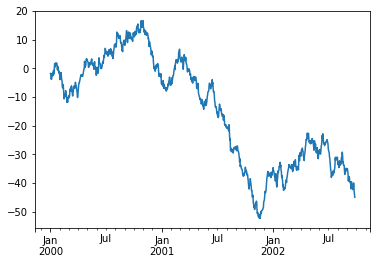

In [87]:
# Plotting
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

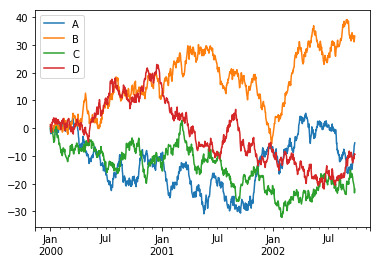

In [94]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()  
#plt.figure()
df.plot()         # ploting all of the columns with labels
plt.legend(loc='best')

In [ ]:
"""
* Getting Data In/Out
# DataFrame.to_csv('file_path')
# pd.read_csv('file_path')

# DataFrame.to_hdf('file_path','df')
# pd.read_hdf('file_path','df')

# DataFrame.to_excel('file_path', sheet_name='Sheet1')
# pd.read_excel('file_path', 'Sheet1', index_col=None, na_values=['NA'])
"""